In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapefile
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colors import Normalize, ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Get all school districts in the US 
lea = pd.read_csv("lea_characteristics.csv", sep=",")

# Get our banned books + districts
df_school_yr_1 = pd.read_csv("PEN_July_1_2021_June_30_2022.csv", sep=",")
df_school_yr_2 = pd.read_csv("PEN_July_1_2022_December_31_2022.csv", sep=",")
books = df_school_yr_1.append(df_school_yr_2)

<ipython-input-2-6b937973bd52>:2: DtypeWarning: Columns (2,6) have mixed types. Specify dtype option on import or set low_memory=False.
  lea = pd.read_csv("lea_characteristics.csv", sep=",")
<ipython-input-2-6b937973bd52>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  books = df_school_yr_1.append(df_school_yr_2)


In [3]:
books

,Author,Title,Type of Ban,Secondary Author(s),Illustrator(s),Translator(s),State,District,Date of Challenge/Removal,Origin of Challenge,Series Name,Ban Status
0,"Àbíké-Íyímídé, Faridah",Ace of Spades,Banned in Libraries and Classrooms,NaN,NaN,NaN,Florida,Indian River County School District,Nov-21,Administrator,NaN,NaN
1,"Acevedo, Elizabeth",Clap When You Land,Banned in Classrooms,NaN,NaN,NaN,Pennsylvania,Central York School District,Aug-21,Administrator,NaN,NaN
2,"Acevedo, Elizabeth",The Poet X,Banned in Libraries,NaN,NaN,NaN,Florida,Indian River County School District,Nov-21,Administrator,NaN,NaN
3,"Acevedo, Elizabeth",The Poet X,Banned in Libraries and Classrooms,NaN,NaN,NaN,New York,Marlboro Central School District,Feb-22,Administrator,NaN,NaN
4,"Acevedo, Elizabeth",The Poet X,Banned Pending Investigation,NaN,NaN,NaN,Texas,Fredericksburg Independent School District,Mar-22,Administrator,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1472,"Lyga, Barry",Boy Toy,NaN,NaN,NaN,NaN,Virginia,Spotsylvania County Public Schools,Oct-22,Formal Challenge,NaN,Banned in Libraries and Classrooms
1473,"Arnold, Elana K.",Red Hood,NaN,NaN,NaN,NaN,Virginia,Spotsylvania County Public Schools,Oct-22,Formal Challenge,NaN,Banned in Libraries and Classrooms
1474,"McQuiston, Casey","Red, White, and Royal Blue",NaN,NaN,NaN,NaN,Virginia,Spotsylvania County Public Schools,Oct-22,Formal Challenge,NaN,Banned in Libraries and Classrooms
1475,"Kobabe, Maia",Gender Queer: A Memoir,NaN,NaN,NaN,NaN,Wyoming,Natrona County Schools,Oct-22,Formal Challenge,NaN,Banned Pending Investigation


In [4]:
tmp = books.groupby(by="State")["District"].count().reset_index()

In [5]:
tmp

,State,District
0,Alaska,1
1,Arkansas,3
2,California,1
3,Colorado,3
4,Florida,923
5,Georgia,23
6,Idaho,26
7,Illinois,5
8,Indiana,21
9,Iowa,11


In [6]:
texas_books = books.loc[books["State"] == "Texas"]

# Replace all instances of Independent school district with ISD
texas_books["District"] = texas_books["District"].str.lower()
texas_books["District"] = texas_books["District"].str.replace('independent school district', 'isd', case=False)
texas_districts = texas_books.groupby(by="District")["Title"].count().reset_index()
texas_districts

<ipython-input-6-9fab774ccbd0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_books["District"] = texas_books["District"].str.lower()
<ipython-input-6-9fab774ccbd0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_books["District"] = texas_books["District"].str.replace('independent school district', 'isd', case=False)


,District,Title
0,belton isd,10
1,birdville isd,14
2,canutillo isd,1
3,clear creek isd,7
4,conroe isd,10
5,cypress-fairbanks isd,16
6,denton isd,1
7,fort bend isd,1
8,fredericksburg isd,42
9,frisco isd,322


In [7]:
shapefile_path = "texas_school_dist_map/Current_Districts_2023.shp"
gdf = gpd.read_file(shapefile_path)

In [8]:
gdf["District"] = gdf["NAME"].str.lower()
map_df = gdf.merge(texas_districts, on="District", how="left")
map_df["Title"] = map_df["Title"].fillna(0)

map_df

,FID,GEOID20,NAME20,SDLEA,NAME,NAME2,DISTRICT_N,DISTRICT,DISTRICT_C,NCES_DISTR,COLOR,Shape__Are,Shape__Len,geometry,District,Title
0,1,4832280,Nederland Independent School District,32280,Nederland ISD,Nederland,123905,123-905,123905,4832280,3,4.892176e+07,35287.497847,"POLYGON ((-94.04917 29.96124, -94.04914 29.965...",nederland isd,0.0
1,2,4838490,Sabine Pass Independent School District,38490,Sabine Pass ISD,Sabine Pass,123913,123-913,123913,4838490,1,9.863762e+08,194516.903820,"POLYGON ((-94.35550 29.72861, -94.34821 29.728...",sabine pass isd,0.0
2,3,4811040,Boys Ranch Independent School District,11040,Boys Ranch ISD,Boys Ranch,180901,180-901,180901,4811040,7,1.272250e+06,4542.875206,"POLYGON ((-102.26001 35.52919, -102.25986 35.5...",boys ranch isd,0.0
3,4,4821300,Grady Independent School District,21300,Grady ISD,Grady,156905,156-905,156905,4821300,6,7.940717e+08,174729.635533,"POLYGON ((-102.21112 32.32685, -102.21112 32.3...",grady isd,0.0
4,5,4845420,Wheeler Independent School District,45420,Wheeler ISD,Wheeler,242903,242-903,242903,4845420,6,4.762594e+08,155879.687605,"POLYGON ((-100.55690 35.38839, -100.55013 35.3...",wheeler isd,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,1014,4818810,Everman Independent School District,18810,Everman ISD,Everman,220904,220-904,220904,4818810,4,4.654191e+07,50205.734813,"POLYGON ((-97.30905 32.66954, -97.30880 32.669...",everman isd,0.0
1014,1015,4820960,Godley Independent School District,20960,Godley ISD,Godley,126911,126-911,126911,4820960,6,3.211704e+08,139973.975169,"POLYGON ((-97.53224 32.59735, -97.53227 32.596...",godley isd,0.0
1015,1016,4819700,Fort Worth Independent School District,19700,Fort Worth ISD,Fort Worth,220905,220-905,220905,4819700,3,5.422589e+08,253181.752455,"POLYGON ((-97.49068 32.86732, -97.49041 32.867...",fort worth isd,0.0
1016,1017,4812180,Burleson Independent School District,12180,Burleson ISD,Burleson,126902,126-902,126902,4812180,6,1.303741e+08,81925.373915,"POLYGON ((-97.29639 32.59136, -97.29640 32.591...",burleson isd,0.0


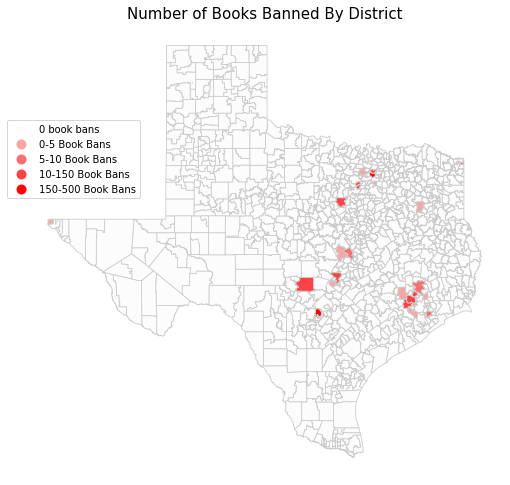

In [15]:
# fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# map_df.plot(column='Title', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# # Add labels and title
# ax.set_title('Number of Books Banned Across Texas School Districts', fontdict={'fontsize': '15', 'fontweight' : '3'})
# ax.set_axis_off()

# # Show the plot
# plt.show()
# Plot the choropleth map

bins = [-1, 0, 5, 10, 150, 500]  # Adjust the bin edges as needed
labels = ["0 book bans", '0-5 Book Bans', '5-10 Book Bans', '10-150 Book Bans', '150-500 Book Bans']

# Create a new categorical column based on the bin edges and labels
map_df['Category'] = pd.cut(map_df['Title'], bins=bins, labels=labels, include_lowest=True)

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
divider = make_axes_locatable(ax)

# Define color map and normalization
custom_colors = ['#fcfcfc', '#f7a6a6', '#fa7070', '#fc4444', '#ff0303']  # Adjust colors as needed
# Create a ListedColormap using the custom colors
cmap = ListedColormap(custom_colors)
norm = Normalize(vmin=0, vmax=len(labels)-1)

# Plot the map
map_df.plot(column='Category', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add labels and title
ax.set_title('Number of Books Banned By District', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_axis_off()

# Adjust the legend position using the 'bbox_to_anchor' parameter
legend = ax.get_legend()
legend.set_bbox_to_anchor((0.25, 0.8))  # Adjust coordinates as needed

# Show the plot
plt.show()

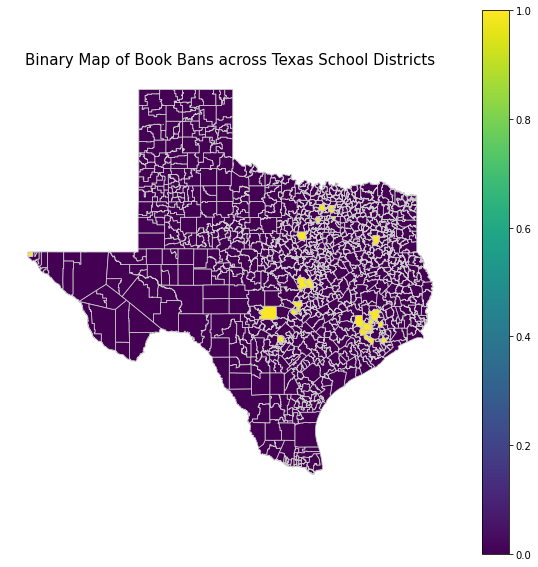

In [10]:
binary_map = map_df.copy()
binary_map['book_ban_binary'] = (binary_map['Title'] > 0).astype(int)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
binary_map.plot(column='book_ban_binary', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add labels and title
ax.set_title('Binary Map of Book Bans across Texas School Districts', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_axis_off()

# Show the plot
plt.show()

In [11]:
len(binary_map.loc[binary_map["book_ban_binary"] != 0])

25

In [12]:
binary_map.sort_values(by="Title")

,FID,GEOID20,NAME20,SDLEA,NAME,NAME2,DISTRICT_N,DISTRICT,DISTRICT_C,NCES_DISTR,COLOR,Shape__Are,Shape__Len,geometry,District,Title,Category,book_ban_binary
0,1,4832280,Nederland Independent School District,32280,Nederland ISD,Nederland,123905,123-905,123905,4832280,3,4.892176e+07,35287.497847,"POLYGON ((-94.04917 29.96124, -94.04914 29.965...",nederland isd,0.0,0 book bans,0
665,666,4828780,Malakoff Independent School District,28780,Malakoff ISD,Malakoff,107906,107-906,107906,4828780,7,2.914640e+08,144371.718641,"POLYGON ((-96.19602 32.29816, -96.19603 32.297...",malakoff isd,0.0,0 book bans,0
666,667,4843170,Trinidad Independent School District,43170,Trinidad ISD,Trinidad,107907,107-907,107907,4843170,3,3.848399e+07,37876.474335,"POLYGON ((-96.09174 32.16579, -96.09171 32.164...",trinidad isd,0.0,0 book bans,0
667,668,4818940,Fairfield Independent School District,18940,Fairfield ISD,Fairfield,81902,081-902,081902,4818940,3,1.189862e+09,240980.182452,"POLYGON ((-96.05661 31.98743, -96.05694 31.986...",fairfield isd,0.0,0 book bans,0
668,669,4830720,Mildred Independent School District,30720,Mildred ISD,Mildred,175910,175-910,175910,4830720,7,2.223737e+08,96099.377418,"POLYGON ((-96.33592 32.07602, -96.33538 32.075...",mildred isd,0.0,0 book bans,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,4825260,Keller Independent School District,25260,Keller ISD,Keller,220907,220-907,220907,4825260,5,1.310188e+08,75851.115053,"MULTIPOLYGON (((-97.19721 32.98797, -97.19523 ...",keller isd,52.0,10-150 Book Bans,1
615,616,4842480,Texarkana Independent School District,42480,Texarkana ISD,Texarkana,19907,019-907,019907,4842480,4,7.858430e+07,63187.560192,"POLYGON ((-94.04320 33.52835, -94.04315 33.519...",texarkana isd,58.0,10-150 Book Bans,1
974,975,4821390,Granbury Independent School District,21390,Granbury ISD,Granbury,111901,111-901,111901,4821390,3,6.489958e+08,175429.478442,"POLYGON ((-97.60301 32.58788, -97.60306 32.586...",granbury isd,133.0,10-150 Book Bans,1
954,955,4820010,Frisco Independent School District,20010,Frisco ISD,Frisco,43905,043-905,043905,4820010,2,1.939321e+08,79791.619522,"POLYGON ((-96.83882 33.21923, -96.83892 33.216...",frisco isd,322.0,150-500 Book Bans,1
